In [136]:
import pandas as pd
import matplotlib.pyplot as plt



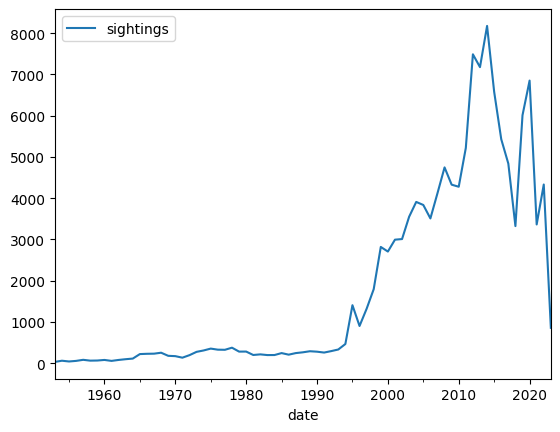

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the data
df3 = pd.read_csv('./ufo_sightings_all.csv')

# Convert the date column to datetime format
df3['date'] = pd.to_datetime(df3['date'])

# Set the date column as the index of the DataFrame
df3.set_index('date', inplace=True)

# Resample the DataFrame by month and count the number of sightings per month
yearly_counts = df3.resample('Y').size()

# Create a new DataFrame with the monthly counts
date_series = pd.DataFrame({'date': yearly_counts.index, 'sightings': yearly_counts.values})

# Set the date column as the index of the DataFrame
date_series.set_index('date', inplace=True)

# Plot the monthly counts
date_series.plot()
plt.show()


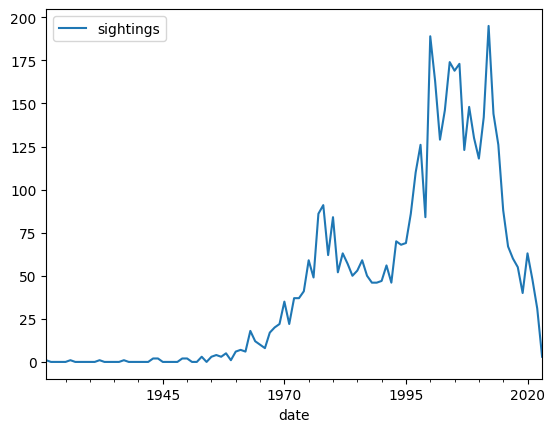

In [138]:
df4 = pd.read_csv('./bigfoot_sightings.csv')
df4['YEAR'] = pd.to_datetime(df4['YEAR'], format='%Y')

df4.set_index('YEAR', inplace=True)

bf_yearly_counts = df4.resample('Y').size()

bf_date_series = pd.DataFrame({'date': bf_yearly_counts.index, 'sightings': bf_yearly_counts.values})

# Set the date column as the index of the DataFrame
bf_date_series.set_index('date', inplace=True)

# Plot the monthly counts
bf_date_series.plot()
plt.show()

In [139]:
# Concatenate the two DataFrames vertically
combined_counts = pd.concat([yearly_counts, bf_yearly_counts], axis=1)

# Rename the columns
combined_counts.columns = ['ufo_sightings', 'bigfoot_sightings']

# Write the combined DataFrame to a CSV file
combined_counts.to_csv('combined_sightings.csv')


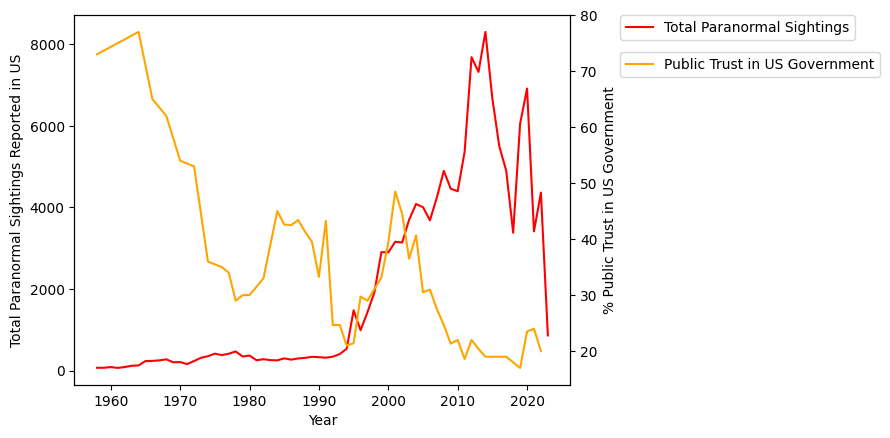

In [142]:
# Create a sample dataframe
df = pd.read_csv("./combined_sightings.csv")
df2 = pd.read_csv("./govtrust.csv")

fig, ax = plt.subplots()

# Plot total sightings
ax.plot(df['Year'], df['total_sighting'], color='red', label='Total Paranormal Sightings')

# Add legend for total sightings
ax.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0)

# Set x and y labels
ax.set_xlabel("Year")
ax.set_ylabel("Total Paranormal Sightings Reported in US")

# Add second y-axis for government trust
ax2=ax.twinx()
ax2.plot(df2['Year'], df2['gov_trust_whole'], color="orange", label='Public Trust in US Government')

# Add legend for government trust
ax2.legend(bbox_to_anchor=(1.1, .9), loc='upper left', borderaxespad=0)
# Set y-label for government trust
ax2.set_ylabel("% Public Trust in US Government")

plt.show()
